Importing the libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
cd

C:\Users\rusha


Reading the dataset

In [159]:
df = pd.read_csv(r"C:\Users\rusha\Downloads\data.csv")

In [160]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


Checking the data

In [161]:
count=df['deposit'].value_counts()

In [162]:
count

no     4428
yes    3943
Name: deposit, dtype: int64

<AxesSubplot:>

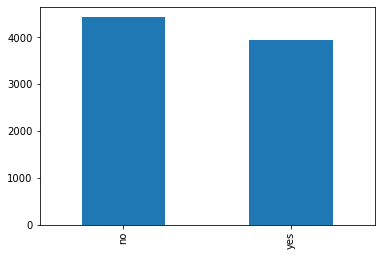

In [163]:
count.plot(kind="bar")

Text(0.5, 0, 'housing(0=no , 1=yes)')

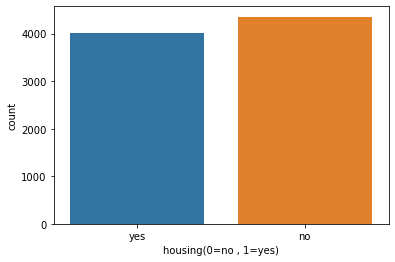

In [164]:
sns.countplot(x = "housing" ,data=df)
plt.xlabel("housing(0=no , 1=yes)")

In [165]:
count=df['housing'].value_counts()
count

no     4354
yes    4017
Name: housing, dtype: int64

We conclude from the above plot that 

1.  4354 individuals did not deposit the money

2.  4017 individuals depositted the money

Applying Machine Learning Techniques

Logistic Regression 

In [166]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [167]:
le=preprocessing.LabelEncoder()
df=df.apply(le.fit_transform)

In [168]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [170]:
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

D:\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
y_pred=lr.predict(x_test)

In [172]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

Confusion Matrix

In [173]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [174]:
cm

array([[716, 183],
       [213, 563]], dtype=int64)

In [175]:
confusion_matrix(y_train,y_train)

array([[3529,    0],
       [   0, 3167]], dtype=int64)

In [176]:
from sklearn.metrics import precision_score , recall_score

In [177]:
precision_score(y_test,y_pred)

0.7546916890080428

In [178]:
recall_score(y_test,y_pred)

0.7255154639175257

In [179]:
from sklearn.metrics import f1_score

In [180]:
f1_score(y_test,y_pred)

0.7398160315374506

In [181]:
accuracy=(716+563)/(716+183+213+563)

In [182]:
accuracy*100

76.35820895522389

In [183]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       899
           1       0.75      0.73      0.74       776

    accuracy                           0.76      1675
   macro avg       0.76      0.76      0.76      1675
weighted avg       0.76      0.76      0.76      1675



Decision Tree Matrix

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test,y_test)*100))

Decision Tree Test Accuracy 75.34%


Random Forest Matrix

In [186]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 83.52%
